In [46]:
import pandas as pd 

data_file = "../results/fid_summary.csv"

df = pd.read_csv(data_file)
df = df[df["exp_name"] != "hidden_b_h200_from_pretrained_weak_h_loss_0080000"]
df['hidden_schedule_max_t'] = df["hidden_schedule_max_t"].fillna(1.0)

In [47]:
df.columns



Index(['exp_name', 'sample_dir', 'inference_type', 'ckpt_step', 'fid50k',
       'num_steps', 'steps_per_pass', 'sampler', 'hidden_schedule_max_t',
       'model_type', 'use_hidden_tokens', 'num_hidden_tokens',
       'share_timestep_embedder', 'share_patch_embedder',
       'use_per_token_encoding', 'hidden_weight', 'hidden_cos_weight',
       'hidden_reg_weight', 'hidden_same_t_as_img', 'normalize_hidden',
       'use_repa', 'repa_weight', 'repa_mode', 'semantic_weight',
       'train_max_steps', 'weight_init', 'config', 'timestamp'],
      dtype='str')

In [48]:
df.head()

,exp_name,sample_dir,inference_type,ckpt_step,fid50k,num_steps,steps_per_pass,sampler,hidden_schedule_max_t,model_type,...,hidden_same_t_as_img,normalize_hidden,use_repa,repa_weight,repa_mode,semantic_weight,train_max_steps,weight_init,config,timestamp
0,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.518269,100,NaN,euler,1.00,HiddenLightningDiT_B_1_H8,...,False,True,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T17:20:16
1,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.519087,100,NaN,euler,0.95,HiddenLightningDiT_B_1_H8,...,False,True,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17
2,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.528724,100,NaN,euler,0.90,HiddenLightningDiT_B_1_H8,...,False,True,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17
3,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.544835,100,NaN,euler,0.80,HiddenLightningDiT_B_1_H8,...,False,True,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17
4,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.557240,100,NaN,euler,0.70,HiddenLightningDiT_B_1_H8,...,False,True,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17


In [49]:
index = ["use_hidden_tokens", "exp_name"]
columns = ["inference_type", "num_steps"]
values = "fid50k"


df.pivot_table(index=index, values=values, columns=columns)

inference_type                                           linear    twopass  \
num_steps                                                   100        100   
use_hidden_tokens exp_name                                                   
False             v2_finetune_no_hidden_0020000       11.081781        NaN   
                  v2_finetune_no_hidden_0040000       10.915206        NaN   
                  v2_finetune_no_hidden_0060000       10.895059        NaN   
                  v2_finetune_no_hidden_0080000       10.833689        NaN   
                  v2_finetune_no_hidden_0100000       10.742610        NaN   
True              v2_base_h16_mse02_0080000           10.707833        NaN   
                  v2_base_mse02_0020000               10.888946        NaN   
                  v2_base_mse02_0040000               10.799089        NaN   
                  v2_base_mse02_0060000               10.753733        NaN   
                  v2_base_mse02_0080000               10.539917  14.357630   
                  v2_base_mse02_0100000               10.681344        NaN   
                  v2_cos02_0080000                    10.785664  24.919576   
                  v2_mse01_cos01_0080000              10.752813  14.547838   
                  v2_mse02_cos02_0080000              10.997856  14.665608   
                  v2_nonshr_temb_mse01_cos01_0080000  11.039948  13.910994   
                  v2_sep_embedder_mse02_0080000       10.878744  14.183688   

inference_type                                                   
num_steps                                                   200  
use_hidden_tokens exp_name                                       
False             v2_finetune_no_hidden_0020000             NaN  
                  v2_finetune_no_hidden_0040000             NaN  
                  v2_finetune_no_hidden_0060000             NaN  
                  v2_finetune_no_hidden_0080000             NaN  
                  v2_finetune_no_hidden_0100000             NaN  
True              v2_base_h16_mse02_0080000                 NaN  
                  v2_base_mse02_0020000                     NaN  
                  v2_base_mse02_0040000                     NaN  
                  v2_base_mse02_0060000                     NaN  
                  v2_base_mse02_0080000               12.613070  
                  v2_base_mse02_0100000                     NaN  
                  v2_cos02_0080000                    21.793082  
                  v2_mse01_cos01_0080000              12.756040  
                  v2_mse02_cos02_0080000              12.943089  
                  v2_nonshr_temb_mse01_cos01_0080000  12.273761  
                  v2_sep_embedder_mse02_0080000       12.485101

In [50]:
df["exp_base_name"] = df["exp_name"].apply(lambda x: "_".join(x.split("_")[:-1]))
df['training_steps'] = df["exp_name"].apply(lambda x: int(x.split("_")[-1]))
df.head()


,exp_name,sample_dir,inference_type,ckpt_step,fid50k,num_steps,steps_per_pass,sampler,hidden_schedule_max_t,model_type,...,use_repa,repa_weight,repa_mode,semantic_weight,train_max_steps,weight_init,config,timestamp,exp_base_name,training_steps
0,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.518269,100,NaN,euler,1.00,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T17:20:16,v2_base_mse02,80000
1,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.519087,100,NaN,euler,0.95,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
2,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.528724,100,NaN,euler,0.90,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
3,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.544835,100,NaN,euler,0.80,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
4,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.557240,100,NaN,euler,0.70,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000


<Axes: xlabel='training_steps', ylabel='fid50k'>

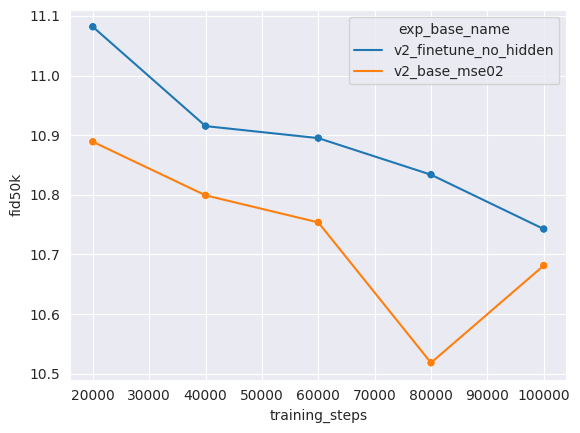

In [54]:
import plotly.express as px
import seaborn as sns
plot_df = df[df["exp_base_name"].isin(["v2_base_mse02", "v2_finetune_no_hidden"])]
plot_df = plot_df[plot_df["inference_type"] == "linear"].sort_values(by="training_steps")
plot_df = plot_df[plot_df["hidden_schedule_max_t"] >=1.0]


# Line plot with training_steps as x and fid50k as y, grouped by exp_base_name
# px.line(plot_df, x="training_steps", y="fid50k", color="exp_base_name")

sns.set_style("darkgrid")
sns.lineplot(x="training_steps", y="fid50k", data=plot_df, hue="exp_base_name")

# Add points to the plot, but don't show legend
sns.scatterplot(x="training_steps", y="fid50k", data=plot_df, hue="exp_base_name", legend=False)



In [33]:
df

,exp_name,sample_dir,inference_type,ckpt_step,fid50k,num_steps,steps_per_pass,sampler,hidden_schedule_max_t,model_type,...,use_repa,repa_weight,repa_mode,semantic_weight,train_max_steps,weight_init,config,timestamp,exp_base_name,training_steps
0,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.518269,100,NaN,euler,NaN,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T17:20:16,v2_base_mse02,80000
1,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.519087,100,NaN,euler,0.95,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
2,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.528724,100,NaN,euler,0.90,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
3,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.544835,100,NaN,euler,0.80,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
4,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.557240,100,NaN,euler,0.70,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
5,v2_base_mse02_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.571347,100,NaN,euler,0.60,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T18:08:17,v2_base_mse02,80000
6,v2_base_mse02_0100000,hiddenlightningdit_b_1_h8-ckpt-0100000-euler-1...,linear,100000,10.681344,100,NaN,euler,NaN,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_mse02.yaml,2026-02-25T05:23:18,v2_base_mse02,100000
7,v2_base_h16_mse02_0080000,hiddenlightningdit_b_1_h16-ckpt-0080000-euler-...,linear,80000,10.707833,100,NaN,euler,NaN,HiddenLightningDiT_B_1_H16,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_base_h16_mse02.yaml,2026-02-24T13:14:46,v2_base_h16_mse02,80000
8,v2_finetune_no_hidden_0100000,lightningdit-b-1-ckpt-0100000-euler-100-balanced,linear,100000,10.742610,100,NaN,euler,NaN,LightningDiT-B/1,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_finetune_no_hidde...,2026-02-24T23:52:15,v2_finetune_no_hidden,100000
9,v2_mse01_cos01_0080000,hiddenlightningdit_b_1_h8-ckpt-0080000-euler-1...,linear,80000,10.752813,100,NaN,euler,NaN,HiddenLightningDiT_B_1_H8,...,True,0.5,cos_mse,2.0,200000,outputs/train/sfd_b_h200_finetune/checkpoints/...,configs/sfd/hidden_b_h200/v2_mse01_cos01.yaml,2026-02-24T13:14:47,v2_mse01_cos01,80000


In [40]:
# df.columns
df.inference_type.unique()

<StringArray>
['linear', 'twopass']
Length: 2, dtype: str

<Axes: xlabel='hidden_schedule_max_t', ylabel='fid50k'>

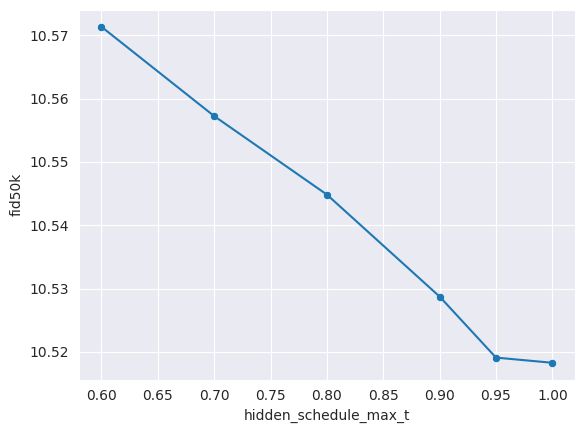

In [43]:
import plotly.express as px
import seaborn as sns
plot_df = df[df["exp_base_name"] == "v2_base_mse02"]
plot_df = plot_df[plot_df["inference_type"] == "linear"]
plot_df = plot_df[plot_df["training_steps"] == 80000]
plot_df = plot_df.sort_values(by="training_steps")
plot_df["hidden_schedule_max_t"] = plot_df["hidden_schedule_max_t"].fillna(1.0)


# Line plot with training_steps as x and fid50k as y, grouped by exp_base_name
# px.line(plot_df, x="training_steps", y="fid50k", color="exp_base_name")

sns.set_style("darkgrid")
sns.lineplot(x="hidden_schedule_max_t", y="fid50k", data=plot_df)

# ADd points to the plot
sns.scatterplot(x="hidden_schedule_max_t", y="fid50k", data=plot_df)

